In [3]:
import pandas as pd
import numpy as np
import nltk

In [10]:
pd.set_option('display.max_colwidth', 200)  # set width of column output

ads = pd.read_csv('../input/emailads.csv',encoding = "ISO-8859-1")
ict = pd.read_csv('../input/emailict.csv',encoding = "ISO-8859-1")
job = pd.read_csv('../input/emailjob.csv',encoding = "ISO-8859-1")
# news = pd.read_csv('../input/emailnews.csv',encoding = "ISO-8859-1")

# Merge data
email = ads.append([ict,job])

# Keep the columns Subject, Body and Category
email = email[['Subject','Body','Category']]
email.head()

# Combine Subject and Body into a single field "Text"
email["Text"] = email['Subject'] + ' ' + email['Body']

# Drop the columns Subject and Body afterwards
email = email.drop(['Subject','Body'], axis=1)
email.head()

Category  \
0      ADS   
1      ADS   
2      ADS   
3      ADS   
4      ADS   

                                                                                                                                                                                                      Text  
0  Alles halve prijs - of nog veel goedkoper!  <https://www.groupon.be/analytic/trackintl.gif?p=1&utm_domain=telenet.be&nlp=&CID=BE&utm_source=channel_goods-deals&utm_medium=email&sid=8bb46cec-d83a-4...  
1  Alles halve prijs - of nog veel goedkoper!  <https://www.groupon.be/analytic/trackintl.gif?p=1&utm_domain=telenet.be&nlp=&CID=BE&utm_source=channel_goods-deals&utm_medium=email&sid=8bb46cec-d83a-4...  
2  Wat krijgen we nu?! Weer EXTRA korting?  <https://www.groupon.be/analytic/trackintl.gif?p=1&utm_domain=telenet.be&nlp=&CID=BE&utm_source=merchandising&utm_medium=email&sid=73b3ddec-705b-4ff7-ba53-...  
3  Wat krijgen we nu?! Weer EXTRA korting?  <https://www.groupon.be/analytic/trackintl.gif?p=1&utm_domain=telenet.be&nlp=&CID=BE&utm_source=merchandising&utm_medium=email&sid=73b3ddec-705b-4ff7-ba53-...  
4  Armband met activiteitstracker, Apple iPhone 6/6 Plus, Winters gezichtsmasker, Apple iPad Air 2, 64GB met 4G & Meer                                                            \n <https://www.group...

In [12]:
# The dimensions of the data
email.shape

(5429, 2)

In [13]:
# The number of emails 
email.count()

Category    5429
Text        5429
dtype: int64

In [15]:
# The number of emails per category
email.groupby('Category').count()

Text
Category      
ADS       2484
ICT       1363
JOB       1582

In [16]:
# language detection - this may take a while!
from langdetect import detect
email['Lang'] = email['Text'].apply(detect)

In [17]:
pd.pivot_table(email, values='Text', index=['Category'],columns=['Lang'], aggfunc='count').fillna(0)

Lang        ca     de      en   fr      nl   pl
Category                                       
ADS       54.0  103.0   773.0  2.0  1550.0  2.0
ICT        0.0    0.0  1140.0  0.0   223.0  0.0
JOB        0.0    9.0   968.0  5.0   600.0  0.0

In [18]:
# Although we know for sure that there are only dutch, english and french emails in the dataset 
# a number of other languages are detected, probably because of the frequent use
# of URL's in the e-mails that are confusing the detect method
# Create emailnl which only contains the emails with Lang = nl

emailnl = email[email['Lang'] == 'nl']
emailnl.head()

Category  \
0      ADS   
1      ADS   
2      ADS   
3      ADS   
4      ADS   

                                                                                                                                                                                                      Text  \
0  Alles halve prijs - of nog veel goedkoper!  <https://www.groupon.be/analytic/trackintl.gif?p=1&utm_domain=telenet.be&nlp=&CID=BE&utm_source=channel_goods-deals&utm_medium=email&sid=8bb46cec-d83a-4...   
1  Alles halve prijs - of nog veel goedkoper!  <https://www.groupon.be/analytic/trackintl.gif?p=1&utm_domain=telenet.be&nlp=&CID=BE&utm_source=channel_goods-deals&utm_medium=email&sid=8bb46cec-d83a-4...   
2  Wat krijgen we nu?! Weer EXTRA korting?  <https://www.groupon.be/analytic/trackintl.gif?p=1&utm_domain=telenet.be&nlp=&CID=BE&utm_source=merchandising&utm_medium=email&sid=73b3ddec-705b-4ff7-ba53-...   
3  Wat krijgen we nu?! Weer EXTRA korting?  <https://www.groupon.be/analytic/trackintl.gif?p=1&utm_domain=telenet.be&nlp=&CID=BE&utm_source=merchandising&utm_medium=email&sid=73b3ddec-705b-4ff7-ba53-...   
4  Armband met activiteitstracker, Apple iPhone 6/6 Plus, Winters gezichtsmasker, Apple iPad Air 2, 64GB met 4G & Meer                                                            \n <https://www.group...   

  Lang  
0   nl  
1   nl  
2   nl  
3   nl  
4   nl

In [19]:
# Create emailen which only contains the emails with Lang = en

emailen = email[email['Lang'] == 'en']
emailen.head()

Category  \
67       ADS   
699      ADS   
757      ADS   
835      ADS   
880      ADS   

                                                                                                                                                                                                        Text  \
67   Speciale VIP-avond - exclusieve uitnodiging   \t\nExclusieve degustatieavond in B-Park Brugge \t\nAls je deze e-mail niet kunt lezen, klik hier <http://t.newsletter.carrefour.eu/r/?id=hf2c1c50,c2b...   
699  Johan, krijg straffe kortingen op heel veel producten Bekijk de topdeals | Gratis verzending | Gratis retourneren | \n <https://gridinbound.blob.core.windows.net/gic/i.png?h=x4XbcxOB6hBkZh8Q3_-nwh...   
757  Zin in een raclette ?   \t\nBestel 3 simply you boxen en krijg er 1 gratis! <http://t.newsletter.carrefour.eu/r/?id=h132e2434,f35a3a0,f3f030a> \t\nAls je deze e-mail niet kunt lezen, klik hier <ht...   
835  Fnac Stripprijs 2018 >> Stem op je favoriete strip    \t\nBekendmaking winnaar in maart \t\nDe webversie bekijken <http://be.r.emails.fnac.com/r/?id=h185ffe00,2f06ab0,2f09342&Origin=mailbe_2f09342...   
880  Blake Lively is 27 kilo kwijt en toont haar lichaam op Instagram - 4 redenen waarom een orgasme goed voor je is Ontdek snel de laatste Feeling-nieuwtjes en acties! \n <https://service.sanoma.com/o...   

    Lang  
67    en  
699   en  
757   en  
835   en  
880   en

In [20]:
# Indeed a number of Dutch e-mails are incorrectly labeled as "English"
# We decide to create a model for the dutch e-mails only.

# First remove the stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import string

stop_words_nl = set(stopwords.words('dutch')) 

punctuations="?:!.,;<>/\+-"

def remove_stopwords_nl(text):
    words = word_tokenize(text)
    result = ''
    for word in words:
        if word not in stop_words_nl and word not in punctuations:
            result += word + ' '
    return result

email['Text'] = email['Text'].map(remove_stopwords_nl)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\svre257\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
# Stemming: replace words by stem
from nltk.stem.snowball import SnowballStemmer

dutchStemmer=SnowballStemmer("dutch")

def stemming_nl(text):
    words = word_tokenize(text)
    result = ''
    for word in words:
        result += dutchStemmer.stem(word) + ' '
    return result    

email['Text'] = email['Text'].map(stemming_nl)

In [51]:
# Split in test and training set
from sklearn.model_selection import train_test_split
X = emailnl.drop('Category',axis=1)
y = emailnl['Category']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

In [52]:
# Apply TfidVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer()
X = vec.fit_transform(X_train['Text'])
print(len(vec.get_feature_names()))

114455


In [53]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.pipeline import make_pipeline

lr = LogisticRegression(solver='newton-cg')
rf = RandomForestClassifier(n_estimators=150)
nb =  MultinomialNB()

voting = VotingClassifier(estimators=[('lr', lr), ('rf', rf), ('mnb', nb)], voting='hard')
model = make_pipeline(TfidfVectorizer(), voting)

model.fit(X_train["Text"], y_train)
categories = model.predict(X_test["Text"])

In [54]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, categories)*100)

99.4452149792


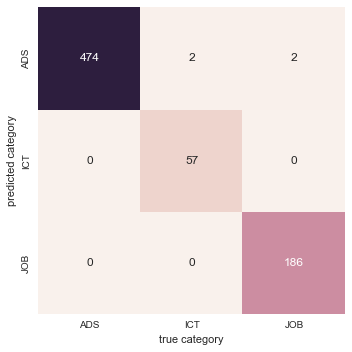

In [55]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

plt.style.use('classic')
%matplotlib inline
import seaborn as sns; sns.set()

mat = confusion_matrix(y_test, categories)

labels = ['ADS','ICT','JOB']

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,xticklabels=labels, yticklabels=labels)
plt.xlabel('true category')
plt.ylabel('predicted category');

In [57]:
def predict_category(s, model=model):
    s = remove_stopwords_nl(s)
    s = stemming_nl(s)
    pred = model.predict([s])
    return pred[0]

predict_category("Alles aan halve prijs en nog veel goedkoper!")

'ADS'